<a href="https://colab.research.google.com/github/seokhee516/Project/blob/main/game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [71]:
df = pd.read_csv("vgames2.csv")

In [89]:
df.head(20)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [111]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

# 결측치 제거

In [7]:
df.isnull().any().any()

True

In [8]:
df.isnull().any()

Unnamed: 0     False
Name           False
Platform       False
Year            True
Genre           True
Publisher       True
NA_Sales       False
EU_Sales       False
JP_Sales       False
Other_Sales    False
dtype: bool

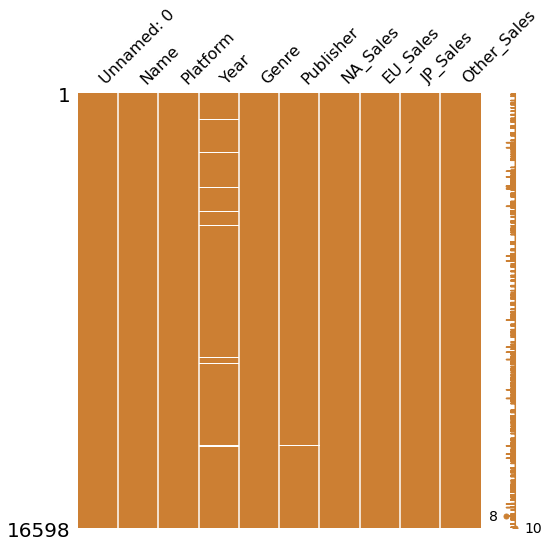

In [11]:
msno.matrix(df=df.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [73]:
df = df.dropna()

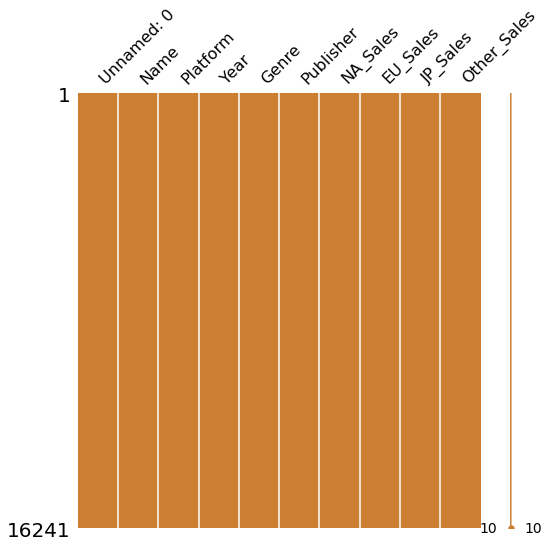

In [38]:
msno.matrix(df=df.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

# 전처리

## year

In [82]:
df.loc[(df['Year'].values <60),'Year'] = df.loc[(df['Year'].values <60),'Year'] + 2000

In [81]:
 df.loc[(df['Year'].values >21) & (df['Year'].values < 100),'Year'] =  df.loc[(df['Year'].values >21) & (df['Year'].values < 100),'Year'] + 1900

In [86]:
df['Year'].astype(int).unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

## sales

In [96]:
df.loc[df['NA_Sales'].str.contains('M'),'NA_Sales'] = df.loc[df['NA_Sales'].str.contains('M'),'NA_Sales'].replace('M','', regex=True)

In [102]:
df.loc[df['EU_Sales'].str.contains('M'),'EU_Sales'] = df.loc[df['EU_Sales'].str.contains('M'),'EU_Sales'].replace('M','', regex=True)
df.loc[df['JP_Sales'].str.contains('M'),'JP_Sales'] = df.loc[df['JP_Sales'].str.contains('M'),'JP_Sales'].replace('M','', regex=True)
df.loc[df['Other_Sales'].str.contains('M'),'Other_Sales'] = df.loc[df['Other_Sales'].str.contains('M'),'Other_Sales'].replace('M','', regex=True)

In [105]:
df.loc[df['NA_Sales'].str.contains('K'),'NA_Sales'] = df.loc[df['NA_Sales'].str.contains('K'),'NA_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000

In [103]:
df.loc[df['EU_Sales'].str.contains('K'),'EU_Sales'] = df.loc[df['EU_Sales'].str.contains('K'),'EU_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000
df.loc[df['JP_Sales'].str.contains('K'),'JP_Sales'] = df.loc[df['JP_Sales'].str.contains('K'),'JP_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000
df.loc[df['Other_Sales'].str.contains('K'),'Other_Sales'] = df.loc[df['Other_Sales'].str.contains('K'),'Other_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000

In [110]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(pd.to_numeric)

# EDA

In [27]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [29]:
df['Publisher'].unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

## 1.지역에 따라서 선호하는 게임 장르가 다를까

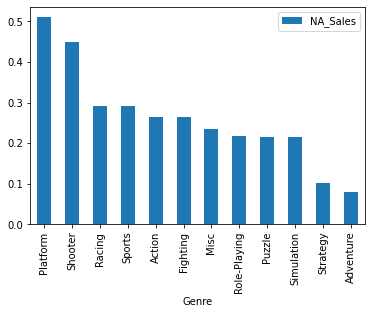

In [118]:
df[['Genre','NA_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='NA_Sales', ascending=False).plot.bar()

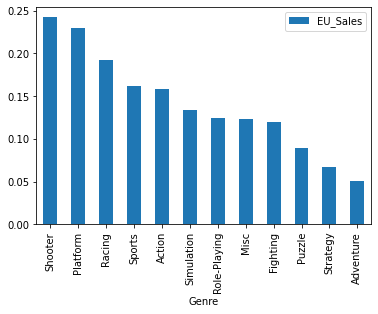

In [119]:
df[['Genre','EU_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='EU_Sales', ascending=False).plot.bar()

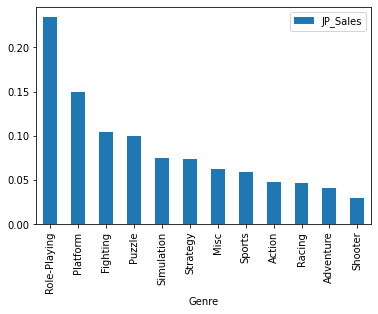

In [120]:
df[['Genre','JP_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='JP_Sales', ascending=False).plot.bar()

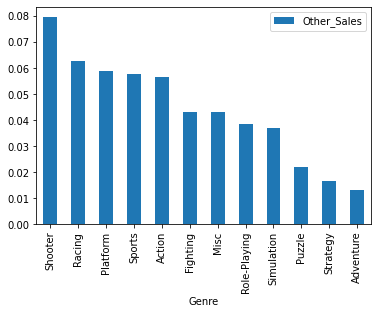

In [121]:
df[['Genre','Other_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='Other_Sales', ascending=False).plot.bar()